# (sFigure12)-Pathway Activitiy Characteristic of Exhausted T Cells.

In [7]:
import omicverse as ov
import scanpy as sc
import pandas as pd
import numpy as np

In [10]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [12]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD4,adata_CD8

(AnnData object with n_obs × n_vars = 6816 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 6184 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga

In [14]:
adata_CD8 = adata_CD8.raw.to_adata()
adata_CD4 = adata_CD4.raw.to_adata()
adata_CD4,adata_CD8

(AnnData object with n_obs × n_vars = 6816 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 6184 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm:

In [16]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

# Metabolism

In [18]:
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/KEGG_2021_Human.txt',organism='Human')
pathway_list = ['Oxidative phosphorylation','Citrate cycle (TCA cycle)',
               'Glycolysis / Gluconeogenesis','Fatty acid degradation',
               'Alanine, aspartate and glutamate metabolism',
                'Amino sugar and nucleotide sugar metabolism','Butanoate metabolism','Cholesterol metabolism',
                'Cysteine and methionine metabolism','D-Glutamine and D-glutamate metabolism','Ether lipid metabolism',
                'Fructose and mannose metabolism','Galactose metabolism','Glutathione metabolism','Glycerolipid metabolism',
                'Glycerophospholipid metabolism','Glycine, serine and threonine metabolism','Glyoxylate and dicarboxylate metabolism',
                'Histidine metabolism','Inositol phosphate metabolism','Linoleic acid metabolism','Nicotinate and nicotinamide metabolism',
                'Nitrogen metabolism','Phenylalanine metabolism','Phosphonate and phosphinate metabolism','Porphyrin and chlorophyll metabolism',
                'Propanoate metabolism','Purine metabolism','Pyrimidine metabolism','Pyruvate metabolism','Retinol metabolism','Riboflavin metabolism',
                'Selenocompound metabolism','Sphingolipid metabolism','Starch and sucrose metabolism','Sulfur metabolism','Taurine and hypotaurine metabolism',
                'Thiamine metabolism','Tryptophan metabolism','Tyrosine metabolism','Vitamin B6 metabolism','alpha-Linolenic acid metabolism',
                'beta-Alanine metabolism'
               ]

for pathway in pathway_list:
    pathway_gene = pathway_dict[pathway]
    sc.tl.score_genes(adata_CD8, pathway_gene, score_name = pathway+' score')
    sc.tl.score_genes(adata_CD4, pathway_gene, score_name = pathway+' score')
adata_CD4,adata_CD8

computing score 'Oxidative phosphorylation score'
       'ATP8', 'ATP6', 'COX3', 'COX2', 'COX1', 'CYTB', 'ND4L'],
      dtype='object')
    finished: added
    'Oxidative phosphorylation score', score of gene set (adata.obs).
    746 total control genes are used. (0:00:00)
computing score 'Oxidative phosphorylation score'
       'ATP8', 'ATP6', 'COX3', 'COX2', 'COX1', 'CYTB', 'ND4L'],
      dtype='object')
    finished: added
    'Oxidative phosphorylation score', score of gene set (adata.obs).
    699 total control genes are used. (0:00:00)
computing score 'Citrate cycle (TCA cycle) score'
    finished: added
    'Citrate cycle (TCA cycle) score', score of gene set (adata.obs).
    498 total control genes are used. (0:00:00)
computing score 'Citrate cycle (TCA cycle) score'
    finished: added
    'Citrate cycle (TCA cycle) score', score of gene set (adata.obs).
    498 total control genes are used. (0:00:00)
computing score 'Glycolysis / Gluconeogenesis score'
    finished: added
   

(AnnData object with n_obs × n_vars = 6816 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Oxidative phosphorylation score', 'Citrate cycle (TCA cycle) score', 'Glycolysis / Gluconeogenesis score', 'Fatty acid degradation score', 'Alanine, aspartate and glutamate metabolism score', 'Amino sugar and nucleotide sugar metabolism score', 'Butanoate metabolism score', 'Cholesterol metabolism score', 'Cysteine and methionine metabolism score', 'D-Glutamine and D-glutamate metabolism score', 'Ether lipid metabolism score', 'Fructose and mannose metabolism score', 'Galactose metabolism score', 'Glutathione metabolism score', 'Glycerolipid metabolism score', 'Glycerophospholipid metabolism score', 'Glycine, serine and threonine metabolism score', 'Glyoxylate and dicarboxylate meta

In [20]:
adata_CD4.uns['Subcelltype_colors']

array(['#BCCE85', '#81B330', '#249F3A', '#0A5D2F', '#89428F', '#c69bc6',
       '#F2BC1D', '#6BBBDA', '#31829F', '#D41661', '#4D4F95'],
      dtype=object)

In [22]:
adata_CD8_ex = adata_CD8[adata_CD8.obs['Subcelltype'].isin(['CD8.CXCL13+.Termianl_Tex','CD8.MAIT'])]
adata_CD4_ex = adata_CD4[adata_CD4.obs['Subcelltype'].isin(['CD4.LAG3+.Treg','CD4.IL26+.Th17'])]
adata_CD8_ex,adata_CD4_ex

(View of AnnData object with n_obs × n_vars = 688 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Oxidative phosphorylation score', 'Citrate cycle (TCA cycle) score', 'Glycolysis / Gluconeogenesis score', 'Fatty acid degradation score', 'Alanine, aspartate and glutamate metabolism score', 'Amino sugar and nucleotide sugar metabolism score', 'Butanoate metabolism score', 'Cholesterol metabolism score', 'Cysteine and methionine metabolism score', 'D-Glutamine and D-glutamate metabolism score', 'Ether lipid metabolism score', 'Fructose and mannose metabolism score', 'Galactose metabolism score', 'Glutathione metabolism score', 'Glycerolipid metabolism score', 'Glycerophospholipid metabolism score', 'Glycine, serine and threonine metabolism score', 'Glyoxylate and dicarboxyla

In [24]:
import anndata as ad
adata_ex = ad.concat([adata_CD4_ex,adata_CD8_ex])
adata_ex

AnnData object with n_obs × n_vars = 1379 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Oxidative phosphorylation score', 'Citrate cycle (TCA cycle) score', 'Glycolysis / Gluconeogenesis score', 'Fatty acid degradation score', 'Alanine, aspartate and glutamate metabolism score', 'Amino sugar and nucleotide sugar metabolism score', 'Butanoate metabolism score', 'Cholesterol metabolism score', 'Cysteine and methionine metabolism score', 'D-Glutamine and D-glutamate metabolism score', 'Ether lipid metabolism score', 'Fructose and mannose metabolism score', 'Galactose metabolism score', 'Glutathione metabolism score', 'Glycerolipid metabolism score', 'Glycerophospholipid metabolism score', 'Glycine, serine and threonine metabolism score', 'Glyoxylate and dicarboxylate metabo

In [26]:
import anndata as ad
adata_pathway = ad.AnnData(adata_ex.obs.iloc[:,15:])
adata_pathway.obs = adata_ex.obs.iloc[:,:15]
adata_pathway.obsm  = adata_ex.obsm
adata_pathway

import scanpy as sc


new_var_names = [var_name.replace(' score', '') for var_name in adata_pathway.var_names]

adata_pathway.var_names = new_var_names



In [28]:
adata_pathway

AnnData object with n_obs × n_vars = 1379 × 44
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

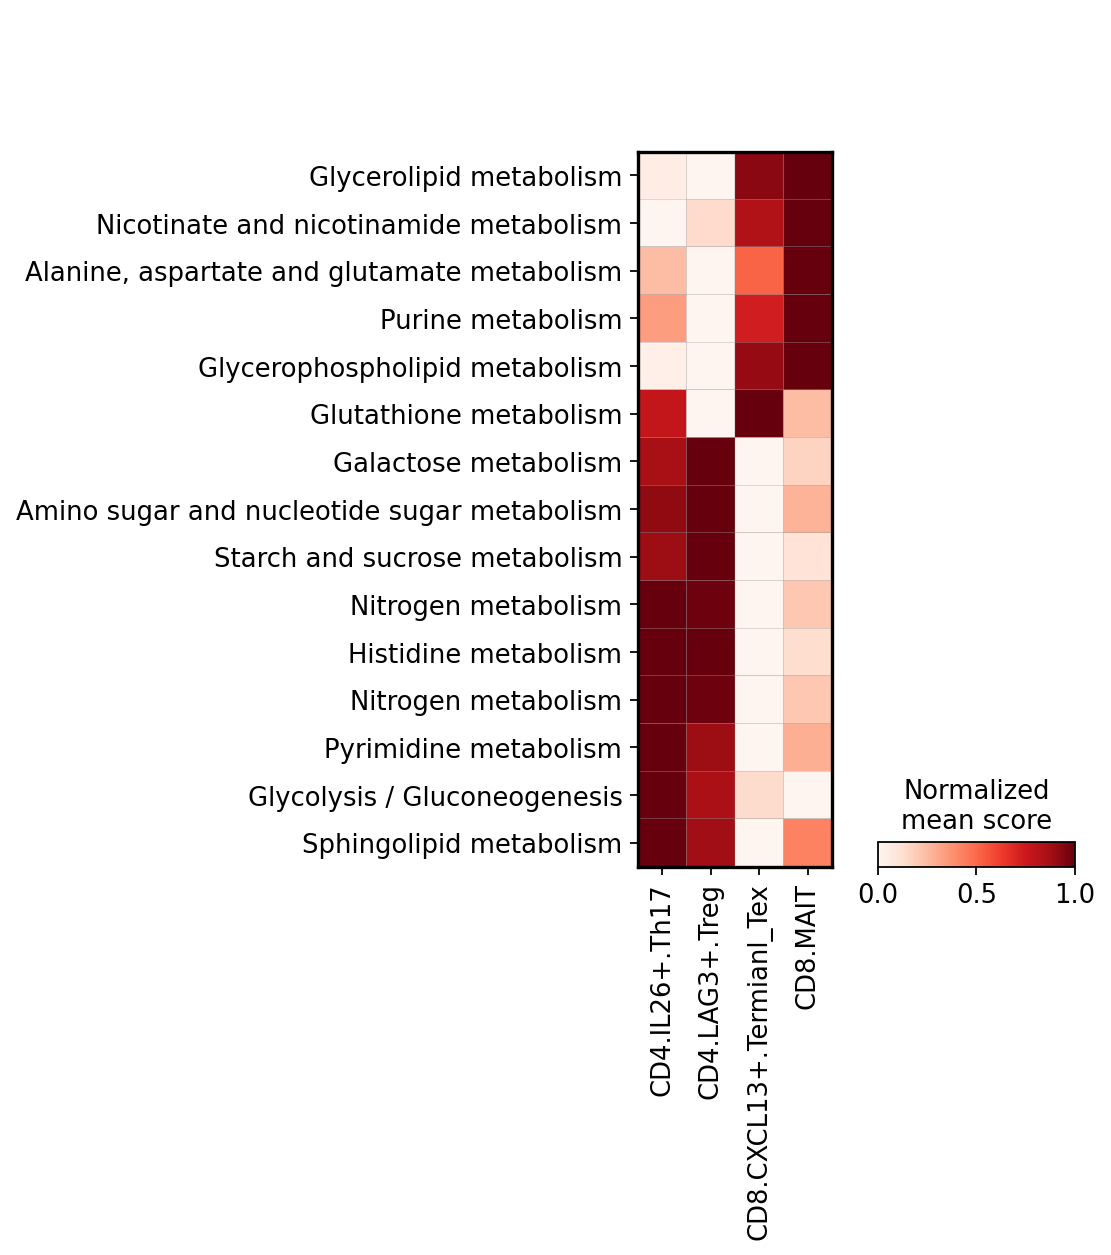

In [30]:
List = ['Glycerolipid metabolism',
         'Nicotinate and nicotinamide metabolism',
     'Alanine, aspartate and glutamate metabolism',
     'Purine metabolism',
    'Glycerophospholipid metabolism',
         'Glutathione metabolism',
    'Galactose metabolism',
     'Amino sugar and nucleotide sugar metabolism',
     'Starch and sucrose metabolism',
        'Nitrogen metabolism',
        'Histidine metabolism',
        'Nitrogen metabolism',
    'Pyrimidine metabolism',
    'Glycolysis / Gluconeogenesis',
     'Sphingolipid metabolism',]
#adata_pathway = adata_pathway[,List]
fig, ax = plt.subplots(figsize=(3.5,7))
sc.pl.matrixplot(
    adata_pathway,
    List,
    "Subcelltype",
    dendrogram=False,
    colorbar_title="Normalized\nmean score",
    standard_scale="var",
    layer=None,swap_axes=True,
    #vmin=-1.5,
    #vmax=1.5,
    cmap="Reds",
    ax = ax,
 #   title='Metabolism pathway score',
)
fig.savefig("Gastric/Figure/sFigure12/sFigure12_A.png",dpi=300,bbox_inches = 'tight')

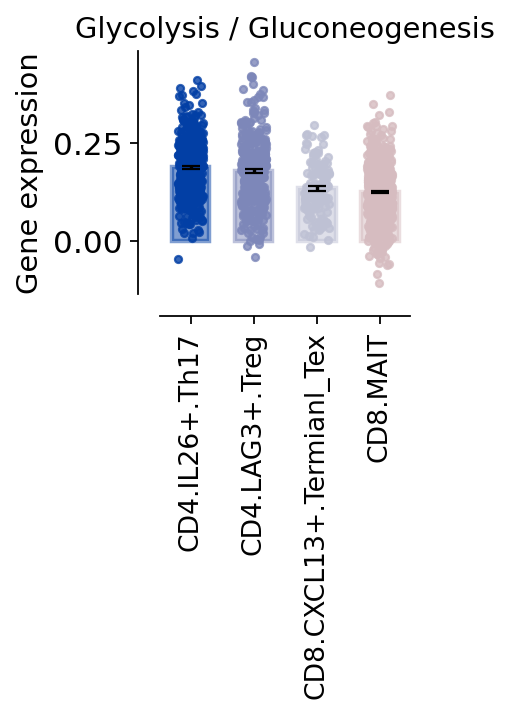

In [32]:
fig, ax = plt.subplots(figsize=(2,2))
ov.pl.bardotplot(adata_pathway,groupby='Subcelltype',color='Glycolysis / Gluconeogenesis',
           ax=ax,
          ylabel='Gene expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})


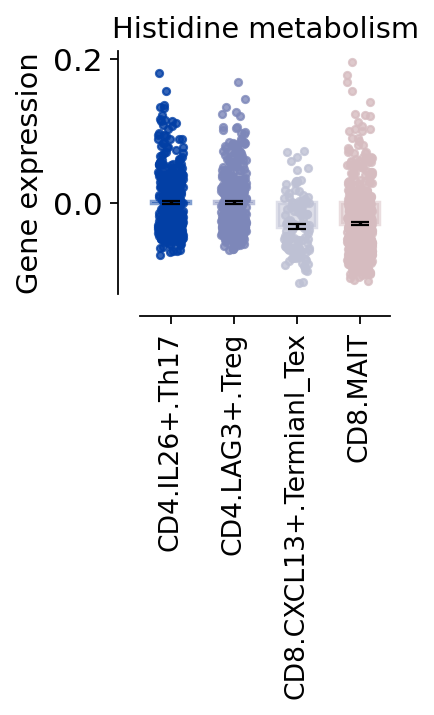

In [34]:
fig, ax = plt.subplots(figsize=(2,2))
ov.pl.bardotplot(adata_pathway,groupby='Subcelltype',color='Histidine metabolism',
           ax=ax,
          ylabel='Gene expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})


# Pathway

In [36]:
adata_CD4_part = adata_CD4[adata_CD4.obs['Subcelltype'].isin(['CD4.IL26+.Th17','CD4.LAG3+.Treg'])]
adata_CD8_part = adata_CD8[adata_CD8.obs['Subcelltype'].isin(['CD8.MAIT','CD8.CXCL13+.Termianl_Tex'])]
adata_CD4_part,adata_CD8_part

(View of AnnData object with n_obs × n_vars = 691 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Oxidative phosphorylation score', 'Citrate cycle (TCA cycle) score', 'Glycolysis / Gluconeogenesis score', 'Fatty acid degradation score', 'Alanine, aspartate and glutamate metabolism score', 'Amino sugar and nucleotide sugar metabolism score', 'Butanoate metabolism score', 'Cholesterol metabolism score', 'Cysteine and methionine metabolism score', 'D-Glutamine and D-glutamate metabolism score', 'Ether lipid metabolism score', 'Fructose and mannose metabolism score', 'Galactose metabolism score', 'Glutathione metabolism score', 'Glycerolipid metabolism score', 'Glycerophospholipid metabolism score', 'Glycine, serine and threonine metabolism score', 'Glyoxylate and dicarboxyla

In [38]:
import anndata as ad
adata_concat = ad.concat([adata_CD4_part,adata_CD8_part])
adata_concat

AnnData object with n_obs × n_vars = 1379 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Oxidative phosphorylation score', 'Citrate cycle (TCA cycle) score', 'Glycolysis / Gluconeogenesis score', 'Fatty acid degradation score', 'Alanine, aspartate and glutamate metabolism score', 'Amino sugar and nucleotide sugar metabolism score', 'Butanoate metabolism score', 'Cholesterol metabolism score', 'Cysteine and methionine metabolism score', 'D-Glutamine and D-glutamate metabolism score', 'Ether lipid metabolism score', 'Fructose and mannose metabolism score', 'Galactose metabolism score', 'Glutathione metabolism score', 'Glycerolipid metabolism score', 'Glycerophospholipid metabolism score', 'Glycine, serine and threonine metabolism score', 'Glyoxylate and dicarboxylate metabo

In [40]:
def insert_newlines(s, n=50):
    if len(s) <= n:
        return s
    parts = s.split(' ')
    new_s = parts[0]
    for part in parts[1:]:
        if len(new_s) - new_s.rfind('\n') + len(part) + 1 > n:
            new_s += '\n' + part
        else:
            new_s += ' ' + part
    return new_s


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


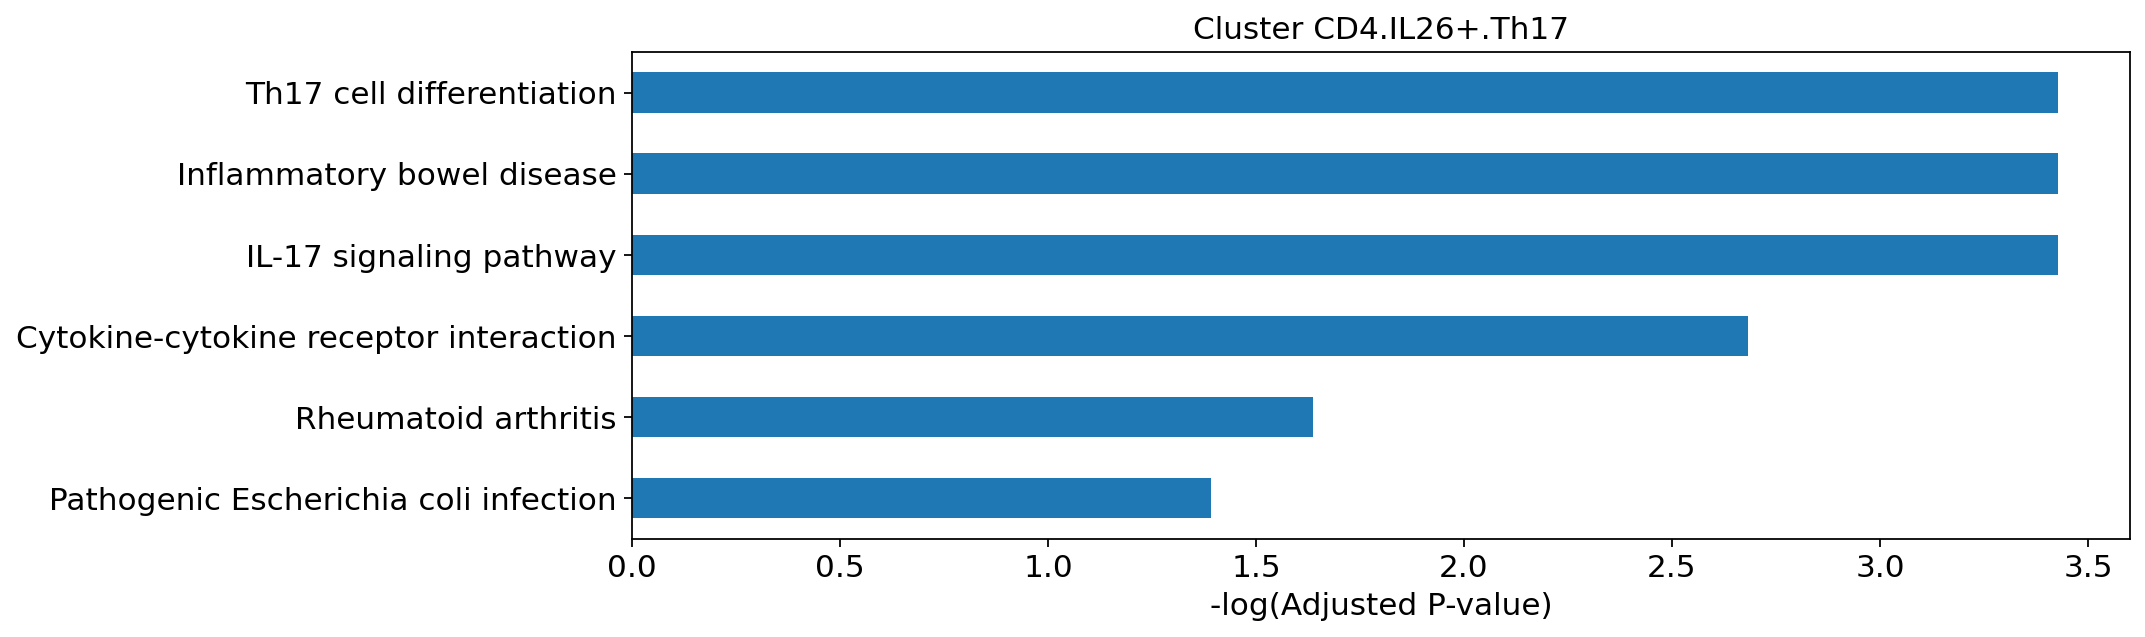

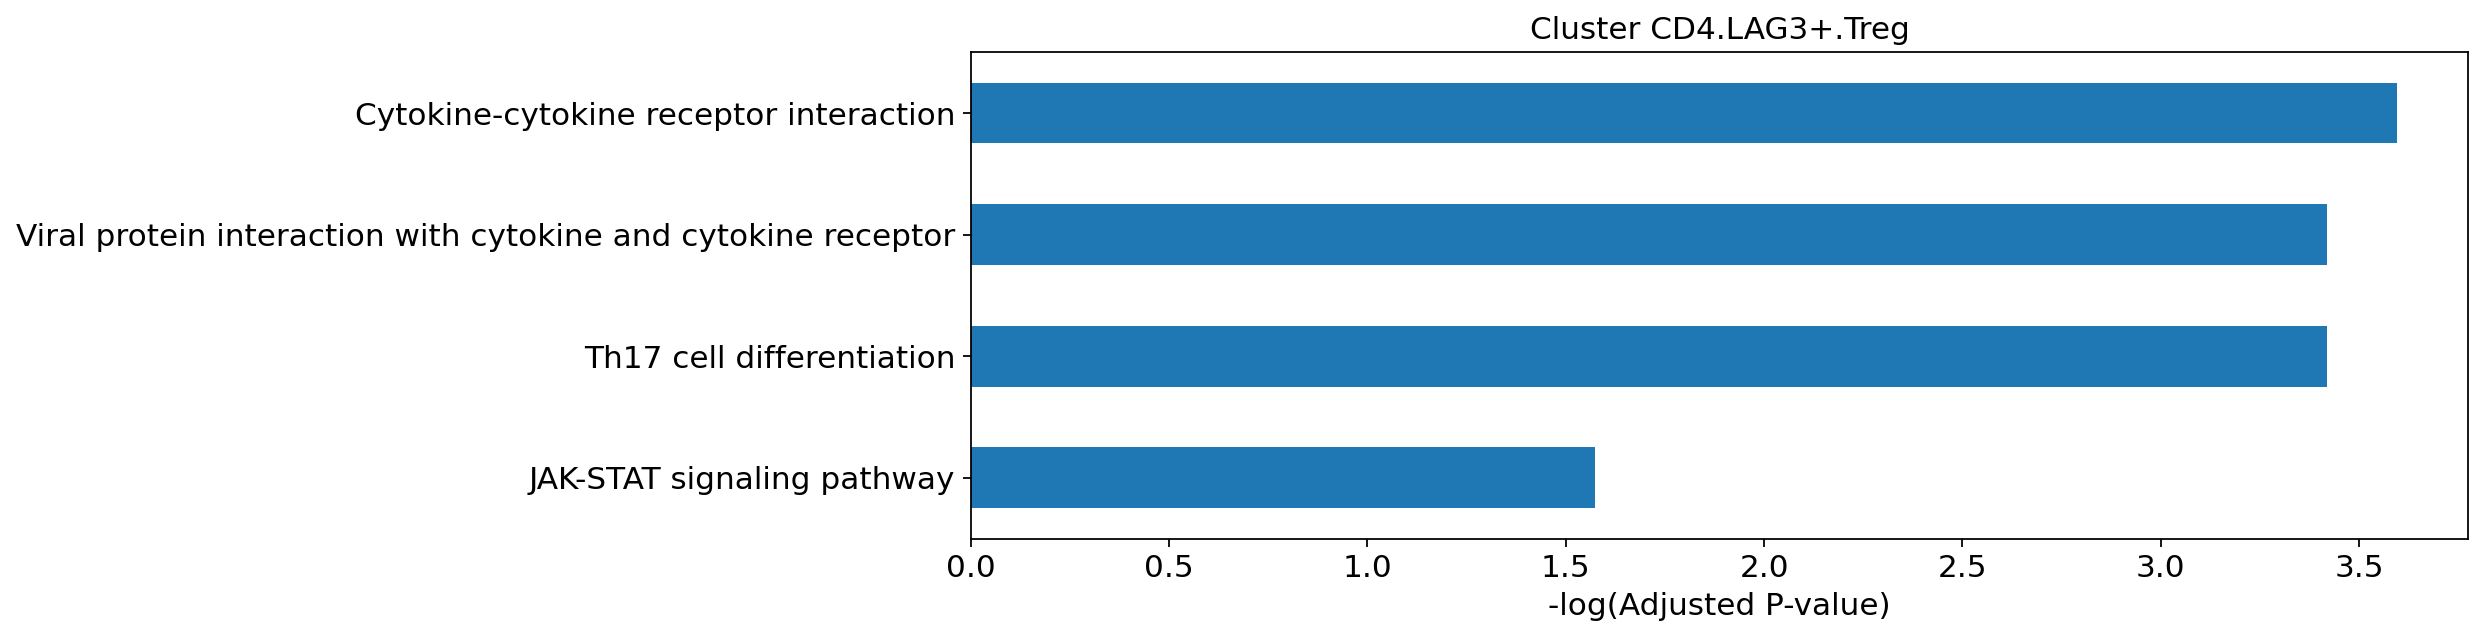

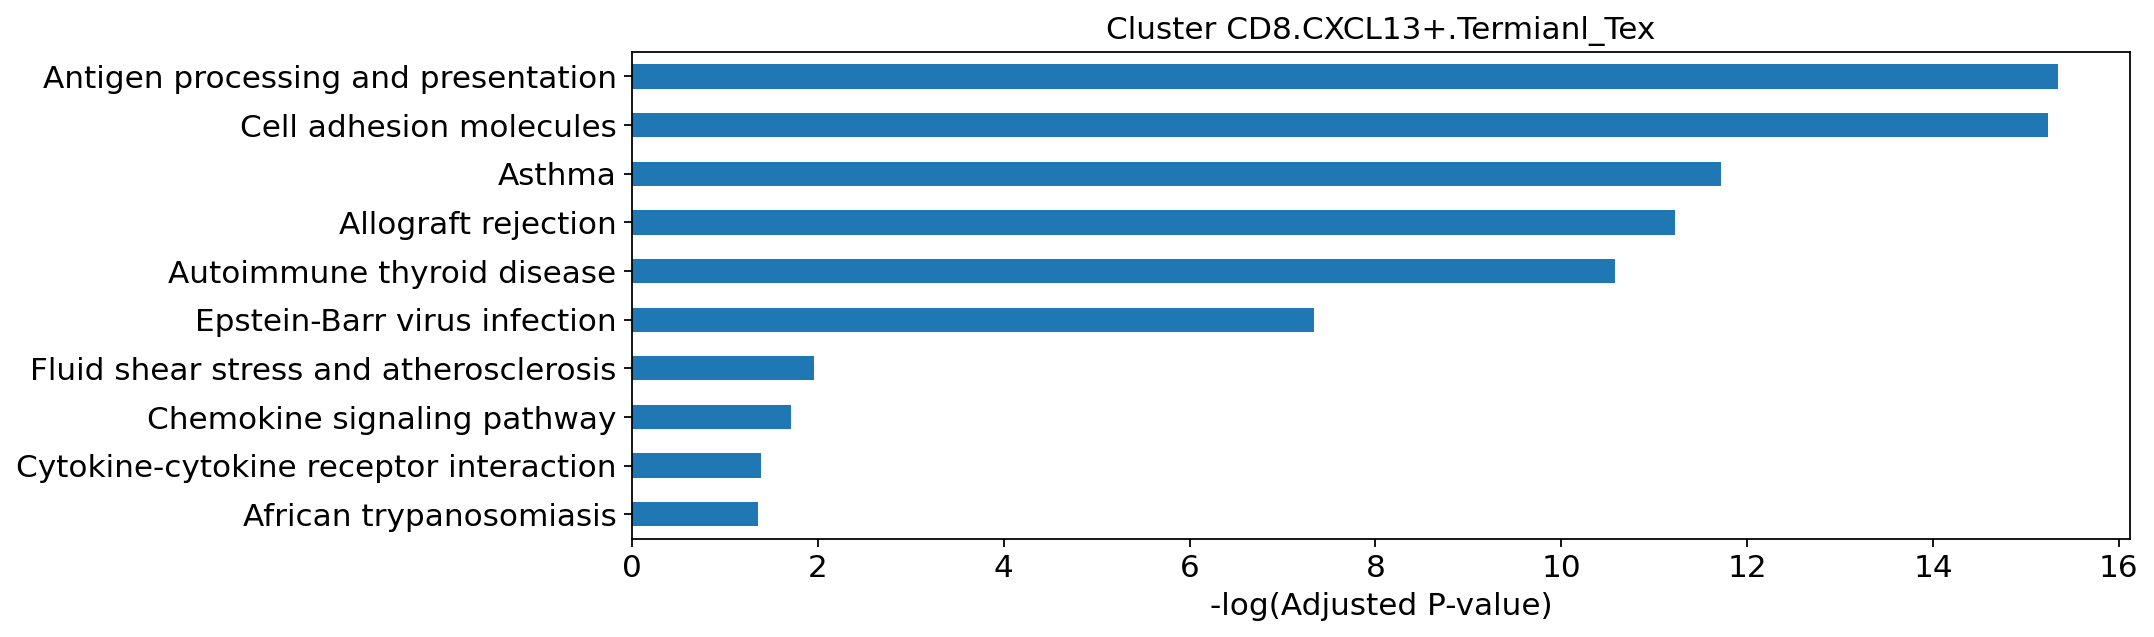

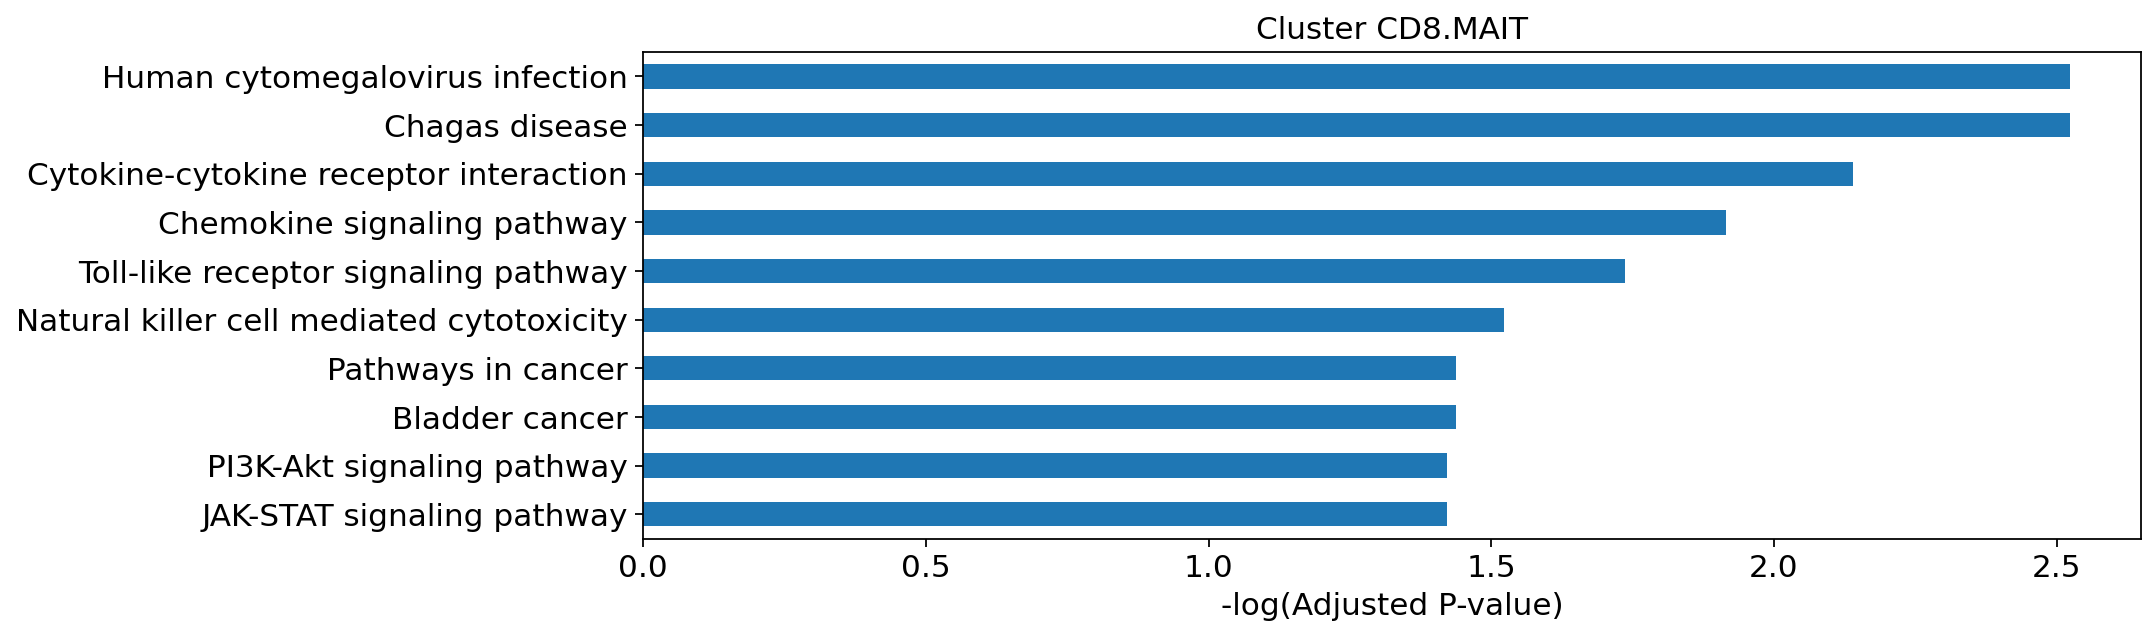

In [48]:
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/KEGG_2021_Human.txt',organism='Human')

adata_concat = adata_concat[:,~adata_concat.var_names.str.contains('RPS')]
adata_concat = adata_concat[:,~adata_concat.var_names.str.contains('RPL')]
adata_concat.uns['log1p']={}
adata_concat.uns['log1p']['base']=None
sc.tl.rank_genes_groups(adata_concat, 'Subcelltype', method='wilcoxon',n_genes=1000)
res=ov.single.pathway_enrichment(adata_concat,pathways_dict=pathway_dict,organism='Human',
                                     group_by='Subcelltype',plot=True)

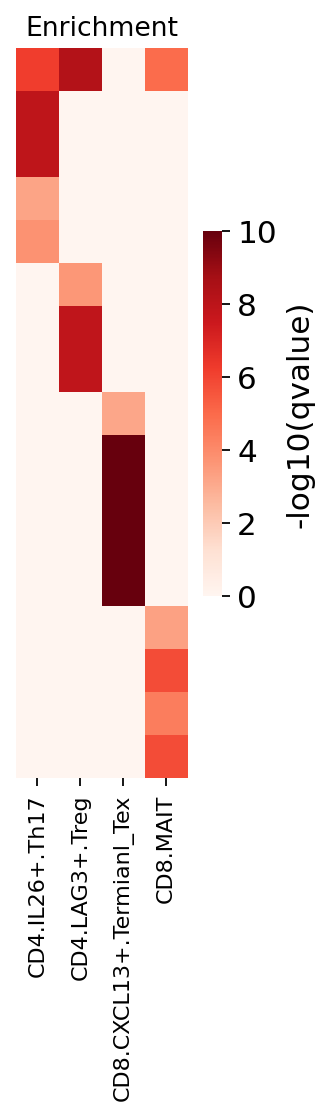

In [49]:
ax=ov.single.pathway_enrichment_plot(res,plot_title='Enrichment',cmap='Reds',
                                         xticklabels=True,cbar=True,square=True,vmax=10,figsize=(2.5,6),
                                         yticklabels=False,cbar_kws={'label': '-log10(qvalue)','shrink': 0.5,})
plt.savefig('Gastric/Figure/sFigure12/sFigure12_B_cbar.png', dpi=300,bbox_inches = 'tight')

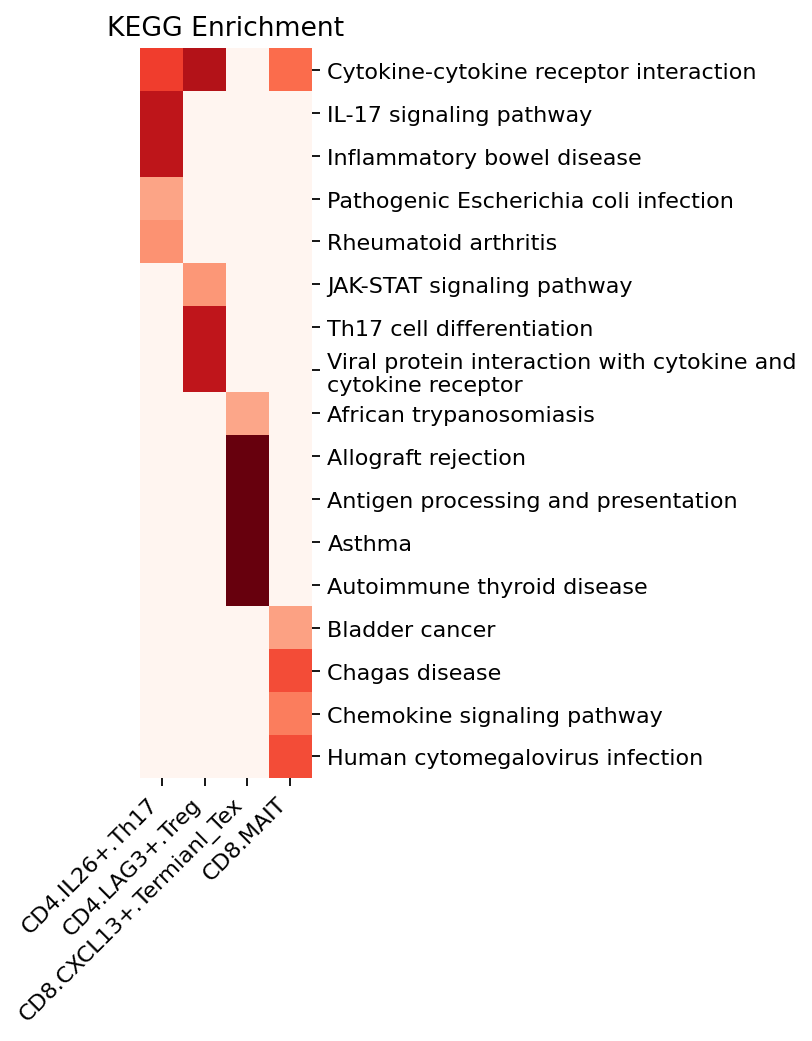

In [50]:
res['Term'] = res['Term'].apply(insert_newlines)
ax=ov.single.pathway_enrichment_plot(res,plot_title='KEGG Enrichment',cmap='Reds',
                                         xticklabels=True,cbar=False,square=True,vmax=10,figsize=(2.5,6),
                                         yticklabels=True,cbar_kws={'label': '-log10(qvalue)','shrink': 0.5,})
labels = [item.get_text() for item in ax.get_xticklabels()]
#ax.set_title('Positive infected tissues')
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.savefig('Gastric/Figure/sFigure12/sFigure12_B.png', dpi=300,bbox_inches = 'tight')

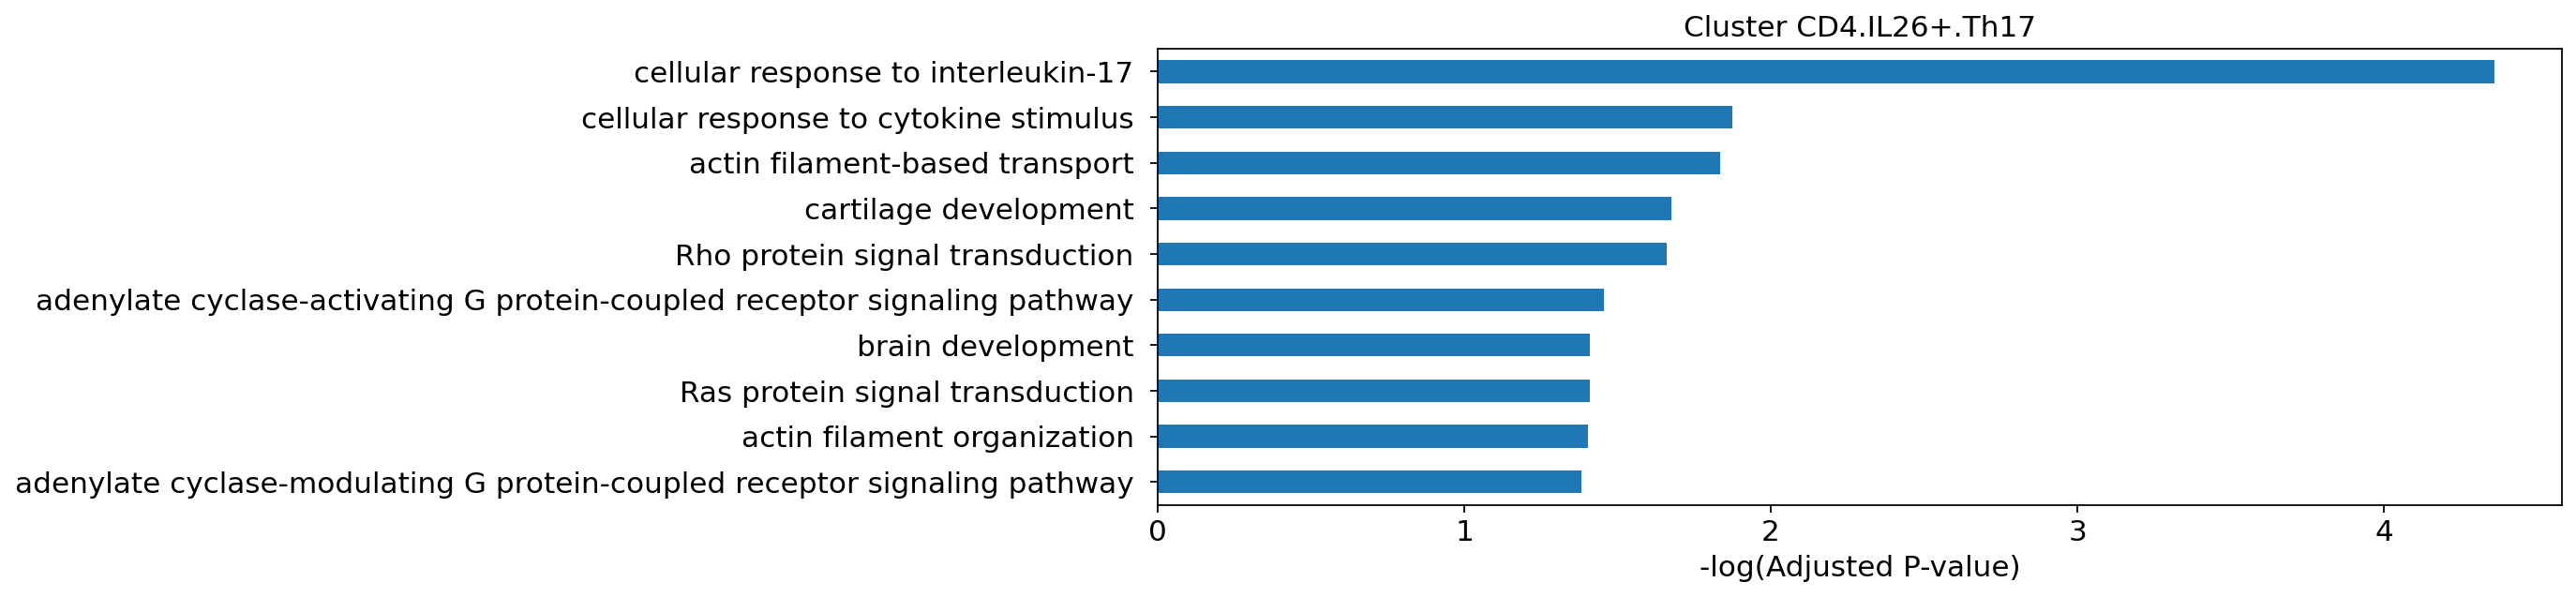

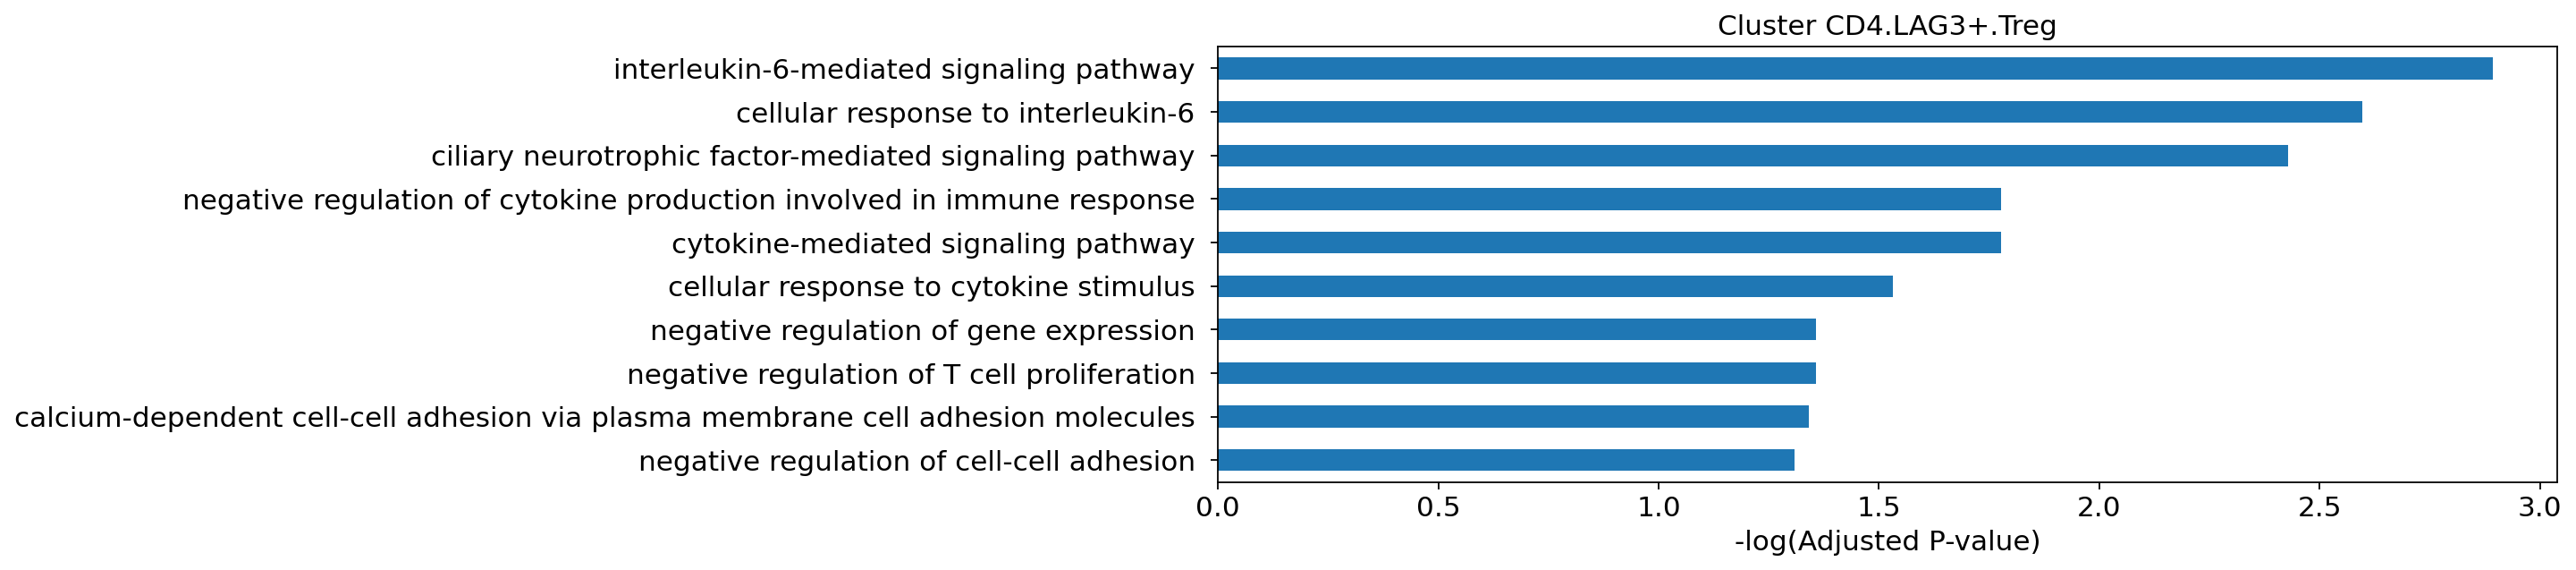

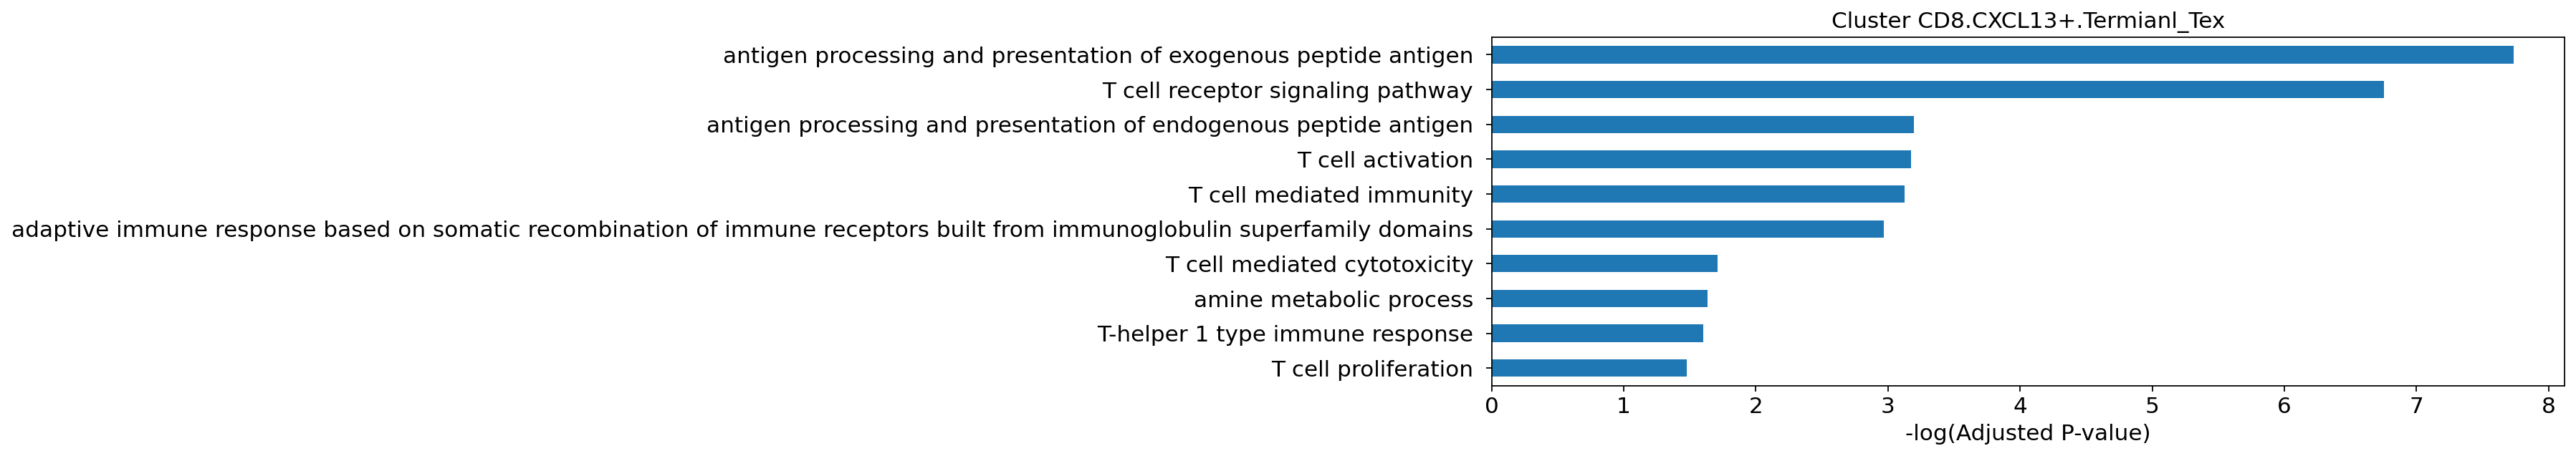

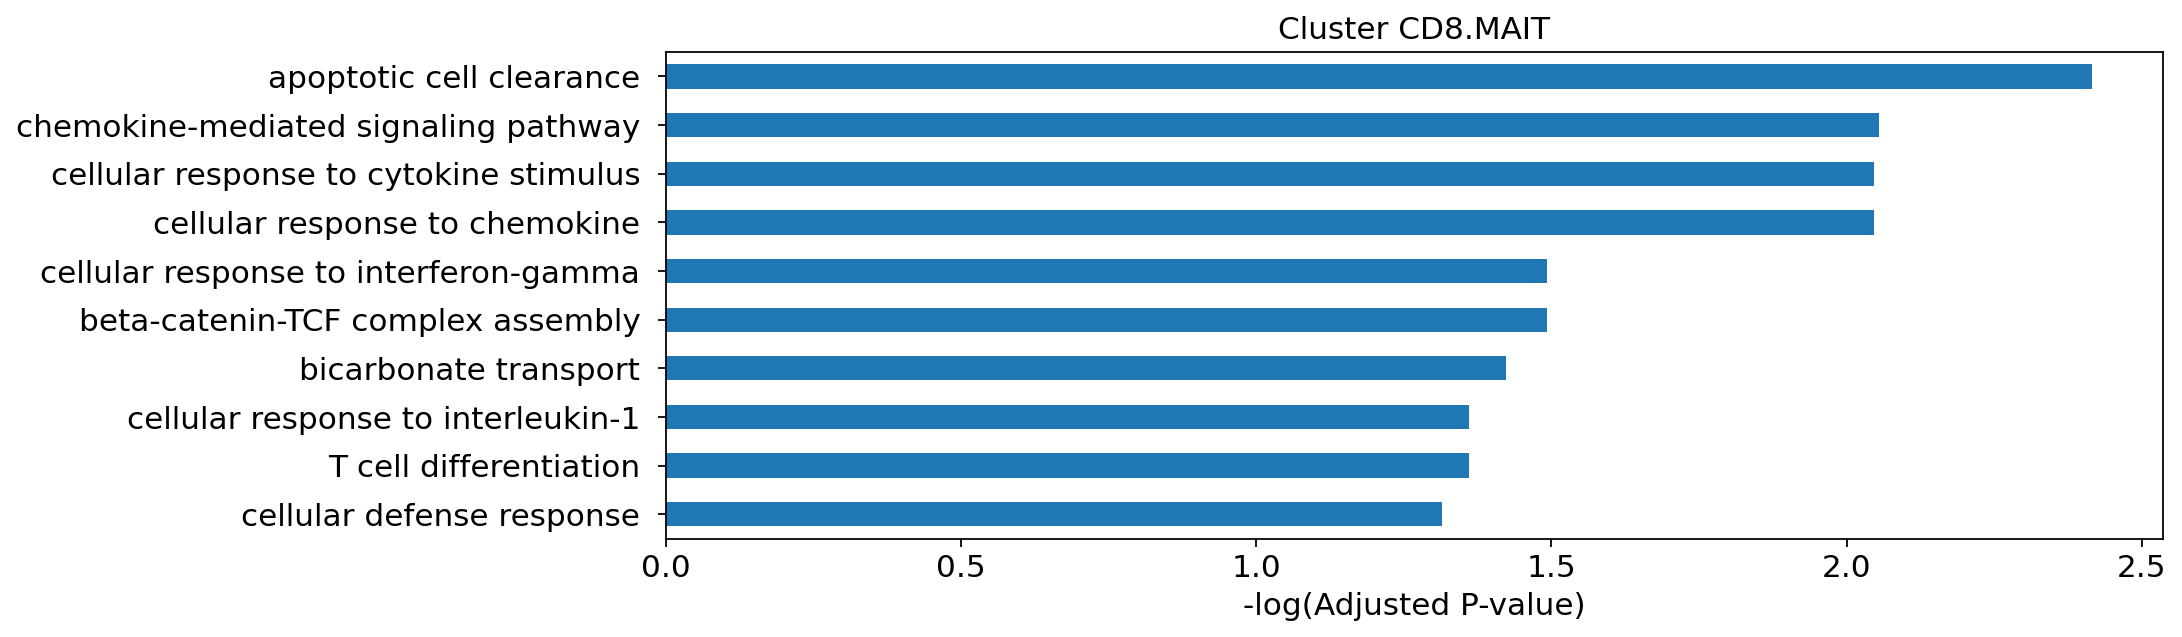

In [51]:
pathway_dict=ov.utils.geneset_prepare('GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
res=ov.single.pathway_enrichment(adata_concat,pathways_dict=pathway_dict,organism='Human',
                                     group_by='Subcelltype',plot=True)

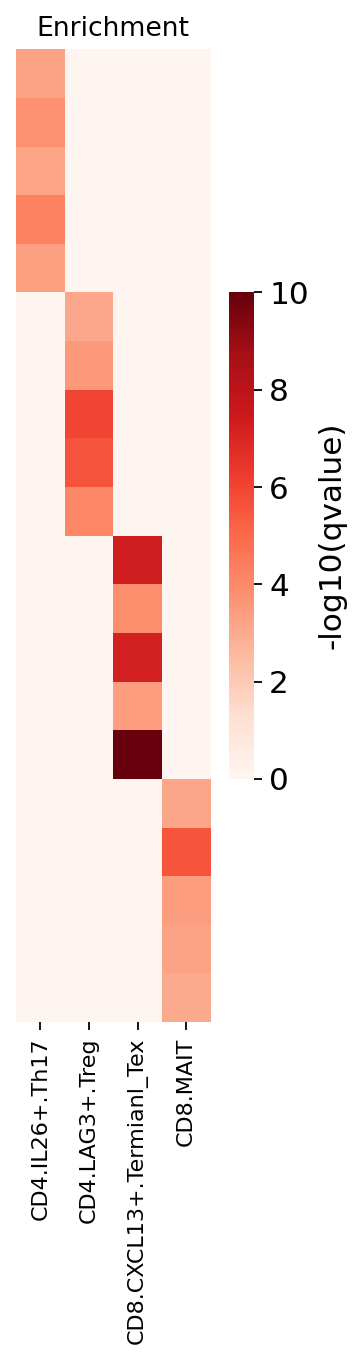

In [52]:
ax=ov.single.pathway_enrichment_plot(res,plot_title='Enrichment',cmap='Reds',
                                         xticklabels=True,cbar=True,square=True,vmax=10,figsize=(3,8),
                                         yticklabels=False,cbar_kws={'label': '-log10(qvalue)','shrink': 0.5,})
plt.savefig('Gastric/Figure/sFigure12/sFigure12_C_cbar.png', dpi=300,bbox_inches = 'tight')

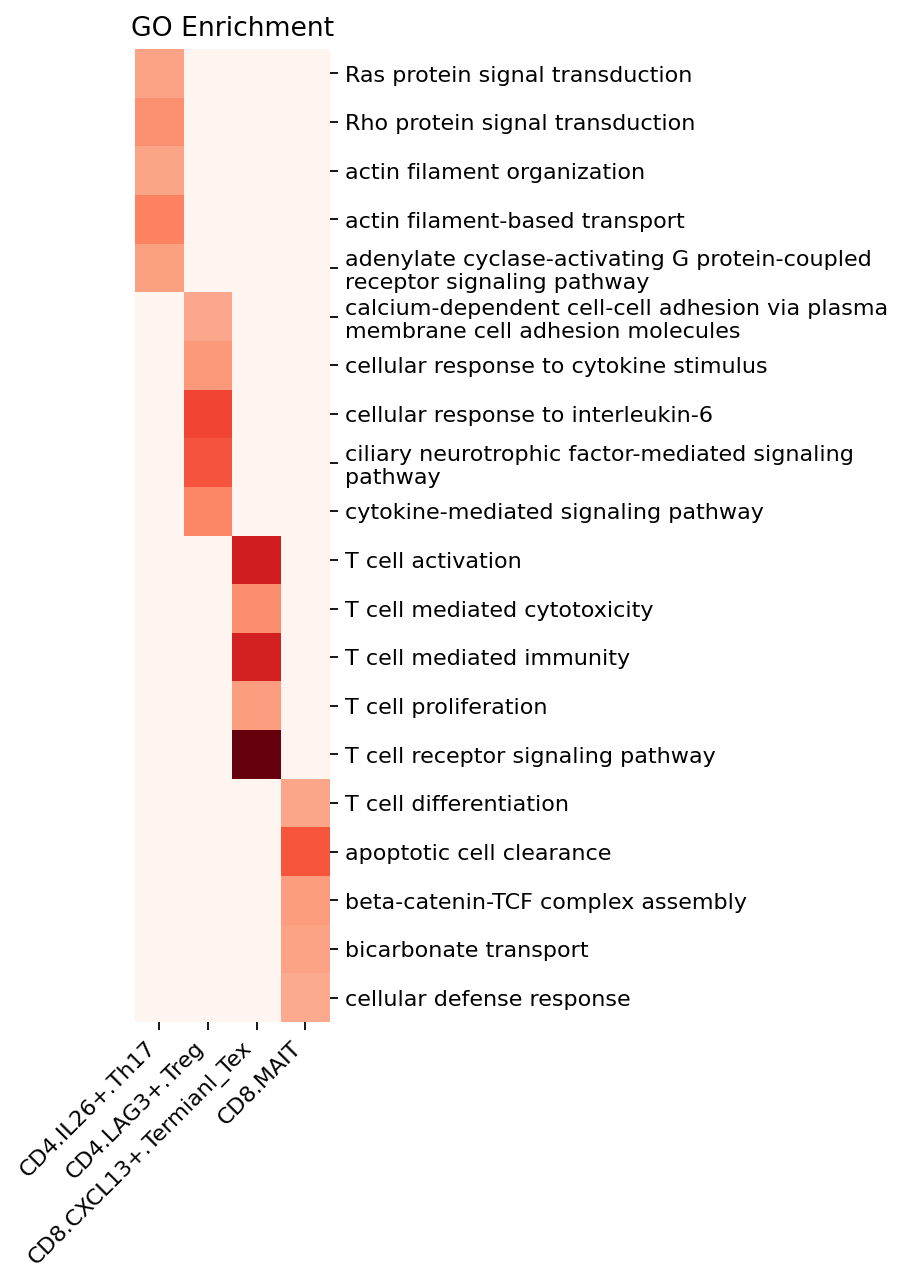

In [53]:
res['Term'] = res['Term'].str.replace('\(GO:\d+\)', '', regex=True)
res['Term'] = res['Term'].apply(insert_newlines)
ax=ov.single.pathway_enrichment_plot(res,plot_title='GO Enrichment',cmap='Reds',
                                         xticklabels=True,cbar=False,square=True,vmax=10,figsize=(3,8),
                                         yticklabels=True,cbar_kws={'label': '-log10(qvalue)','shrink': 0.5,})
labels = [item.get_text() for item in ax.get_xticklabels()]
#ax.set_title('Positive infected tissues')
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.savefig('Gastric/Figure/sFigure12/sFigure12_C.png', dpi=300,bbox_inches = 'tight')

# Pathway

In [47]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD8 = adata_CD8.raw.to_adata()
adata_CD4 = adata_CD4.raw.to_adata()
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4,adata_CD8

(AnnData object with n_obs × n_vars = 6816 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 6184 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_

In [49]:
adata_CD8_ex = adata_CD8[adata_CD8.obs['Subcelltype'].isin(['CD8.CXCL13+.Termianl_Tex','CD8.MAIT'])]
adata_CD4_ex = adata_CD4[adata_CD4.obs['Subcelltype'].isin(['CD4.LAG3+.Treg','CD4.IL26+.Th17'])]
import anndata as ad
adata_concat = ad.concat([adata_CD4_ex,adata_CD8_ex])
adata_concat

AnnData object with n_obs × n_vars = 1379 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

In [50]:
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/KEGG_2021_Human.txt',organism='Human')
pathway = 'T cell receptor signaling pathway'
sc.tl.score_genes(adata_concat, pathway_gene, score_name = pathway+' score')

computing score 'T cell receptor signaling pathway score'
    finished: added
    'T cell receptor signaling pathway score', score of gene set (adata.obs).
    699 total control genes are used. (0:00:00)


In [51]:
adata_concat.uns['Subcelltype_colors'] = ['#F2BC1D', '#D41661', '#2D5C33','#A22E2A',]
adata_concat.uns['Subcelltype_ID_type_colors'] = ['#2D5C33','#A22E2A','#F2BC1D','#D41661',]
adata_concat.uns['Sample_colors'] = adata_CD4.uns['Sample_colors']

(array([0, 1, 2, 3]),
 [Text(0, 0, ''), Text(1, 0, ''), Text(2, 0, ''), Text(3, 0, '')])

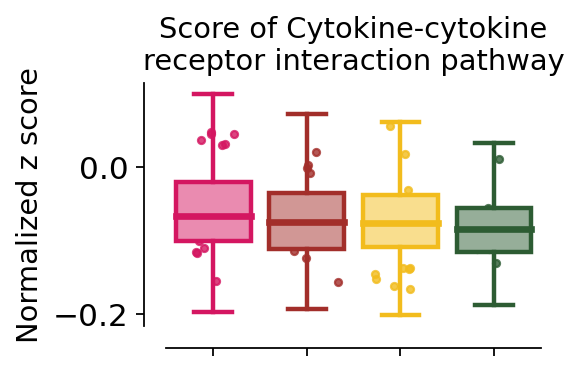

In [52]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')

ax = ov.pl.single_group_boxplot(adata_concat,groupby='Subcelltype_ID_type',
             color='T cell receptor signaling pathway score',
             type_color_dict=dict(zip(pd.Categorical(adata_concat.obs['Subcelltype_ID_type']).categories, adata_concat.uns['Subcelltype_ID_type_colors'])),
             x_ticks_plot=False,
             figsize=(3,2),
             kruskal_test=False,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Score of Cytokine-cytokine\nreceptor interaction pathway',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=False,
             save=False,
             )
    
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
#plt.savefig('Gastric/Figure/Figure3/Figure3_C.png', dpi=300,bbox_inches = 'tight')

In [53]:
for pathway in pathway_dict.keys():
    sc.tl.score_genes(adata_concat, pathway_dict[pathway], score_name = pathway+' score')

computing score 'ABC transporters score'
    finished: added
    'ABC transporters score', score of gene set (adata.obs).
    748 total control genes are used. (0:00:00)
computing score 'AGE-RAGE signaling pathway in diabetic complications score'
    finished: added
    'AGE-RAGE signaling pathway in diabetic complications score', score of gene set (adata.obs).
    796 total control genes are used. (0:00:00)
computing score 'AMPK signaling pathway score'
    finished: added
    'AMPK signaling pathway score', score of gene set (adata.obs).
    697 total control genes are used. (0:00:00)
computing score 'Acute myeloid leukemia score'
    finished: added
    'Acute myeloid leukemia score', score of gene set (adata.obs).
    649 total control genes are used. (0:00:00)
computing score 'Adherens junction score'
    finished: added
    'Adherens junction score', score of gene set (adata.obs).
    650 total control genes are used. (0:00:00)
computing score 'Adipocytokine signaling pathway sco

In [73]:
import anndata as ad
adata_pathway = ad.AnnData(adata_concat.obs.iloc[:,16:])
adata_pathway.obs = adata_concat.obs.iloc[:,:16]
adata_pathway.obsm  = adata_concat.obsm
adata_pathway

import scanpy as sc


new_var_names = [var_name.replace(' score', '') for var_name in adata_pathway.var_names]

adata_pathway.var_names = new_var_names



Storing dendrogram info using `.uns['dendrogram_Subcelltype']`
ranking genes
    finished: added to `.uns['Subcelltype_wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


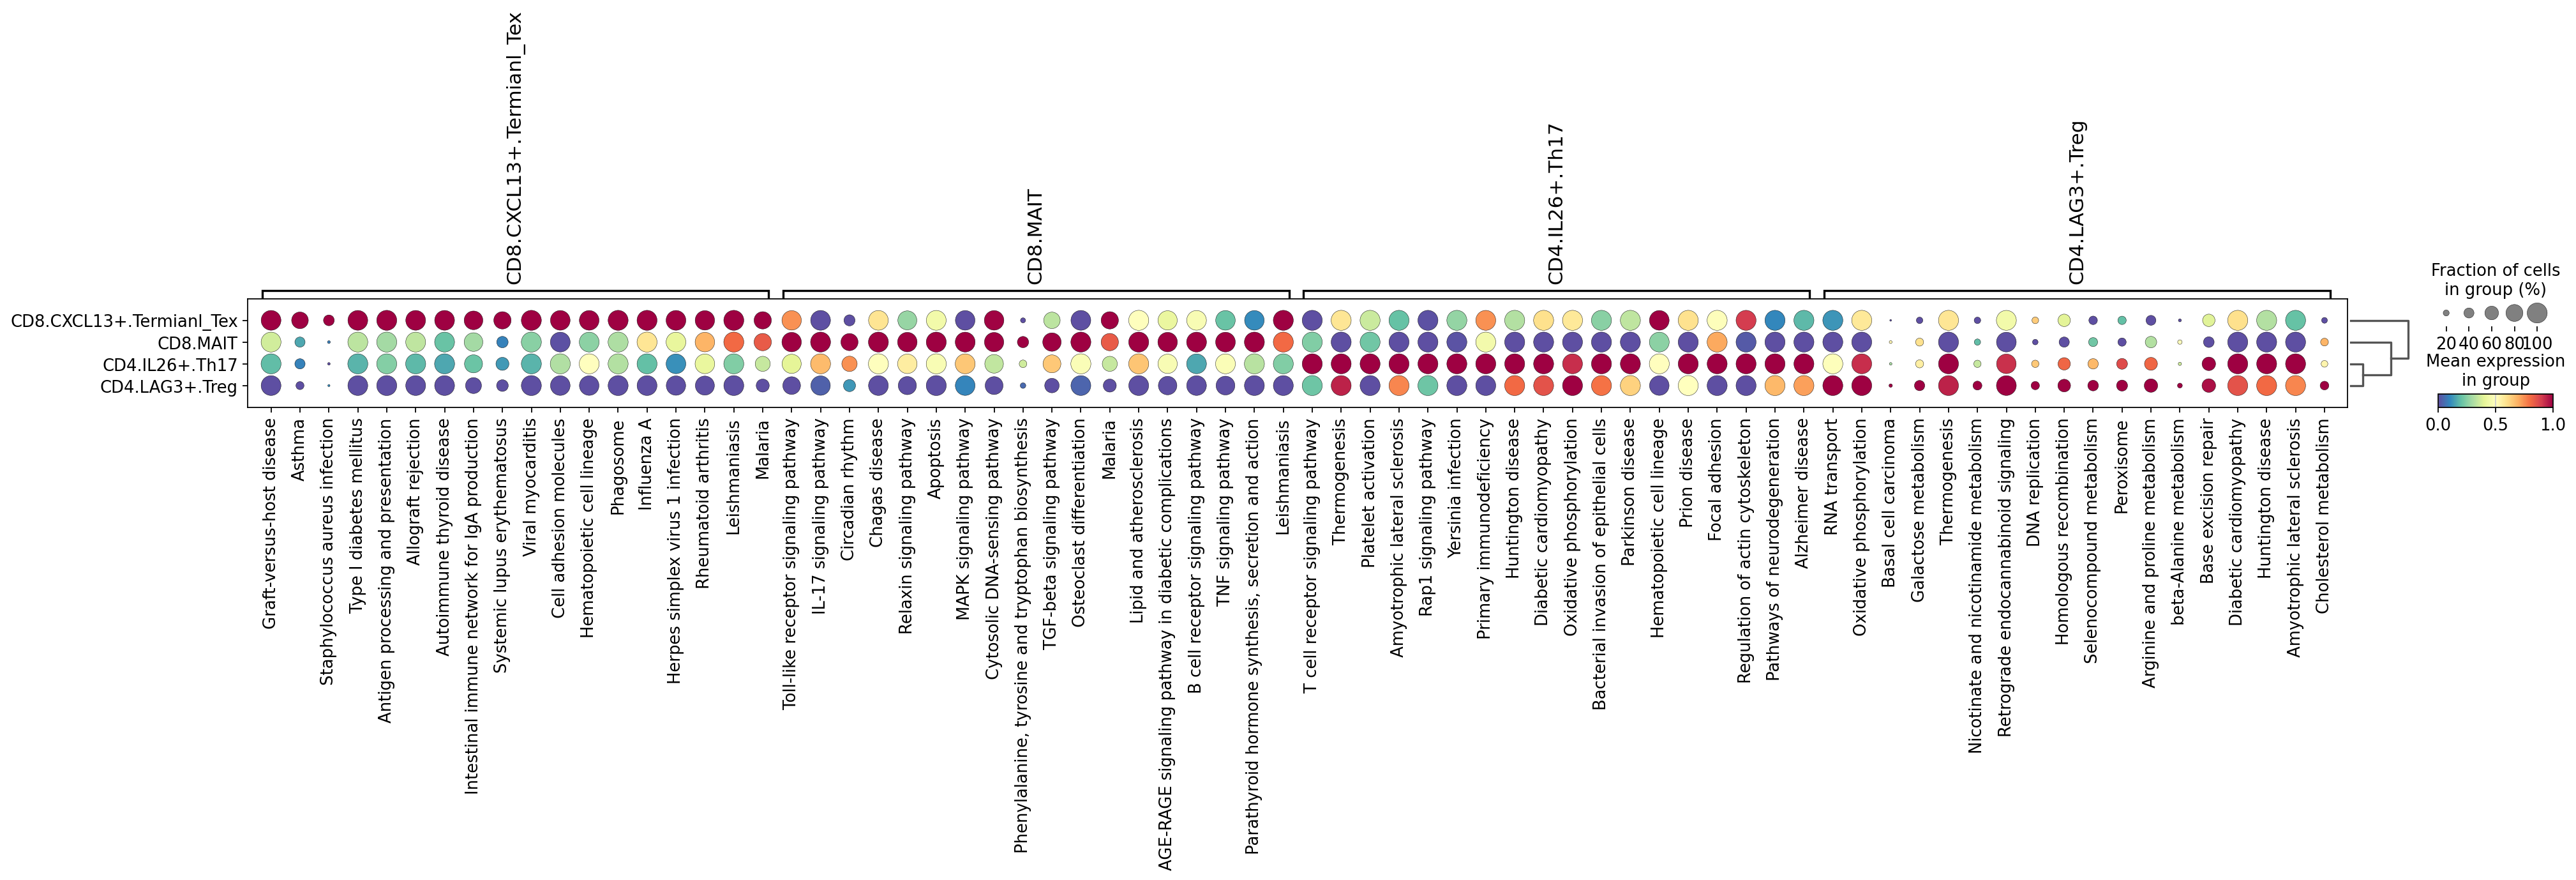

In [74]:
sc.tl.dendrogram(adata_pathway,'Subcelltype',use_rep='X_scVI')
sc.tl.rank_genes_groups(adata_pathway, 'Subcelltype', use_rep='X_scVI',
                        method='wilcoxon',use_raw=False,key_added='Subcelltype_wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata_pathway,groupby='Subcelltype',
                                cmap='Spectral_r',key='Subcelltype_wilcoxon',
                                standard_scale='var',n_genes=18)

Storing dendrogram info using `.uns['dendrogram_Sample']`
ranking genes
    finished: added to `.uns['Subcelltype_wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


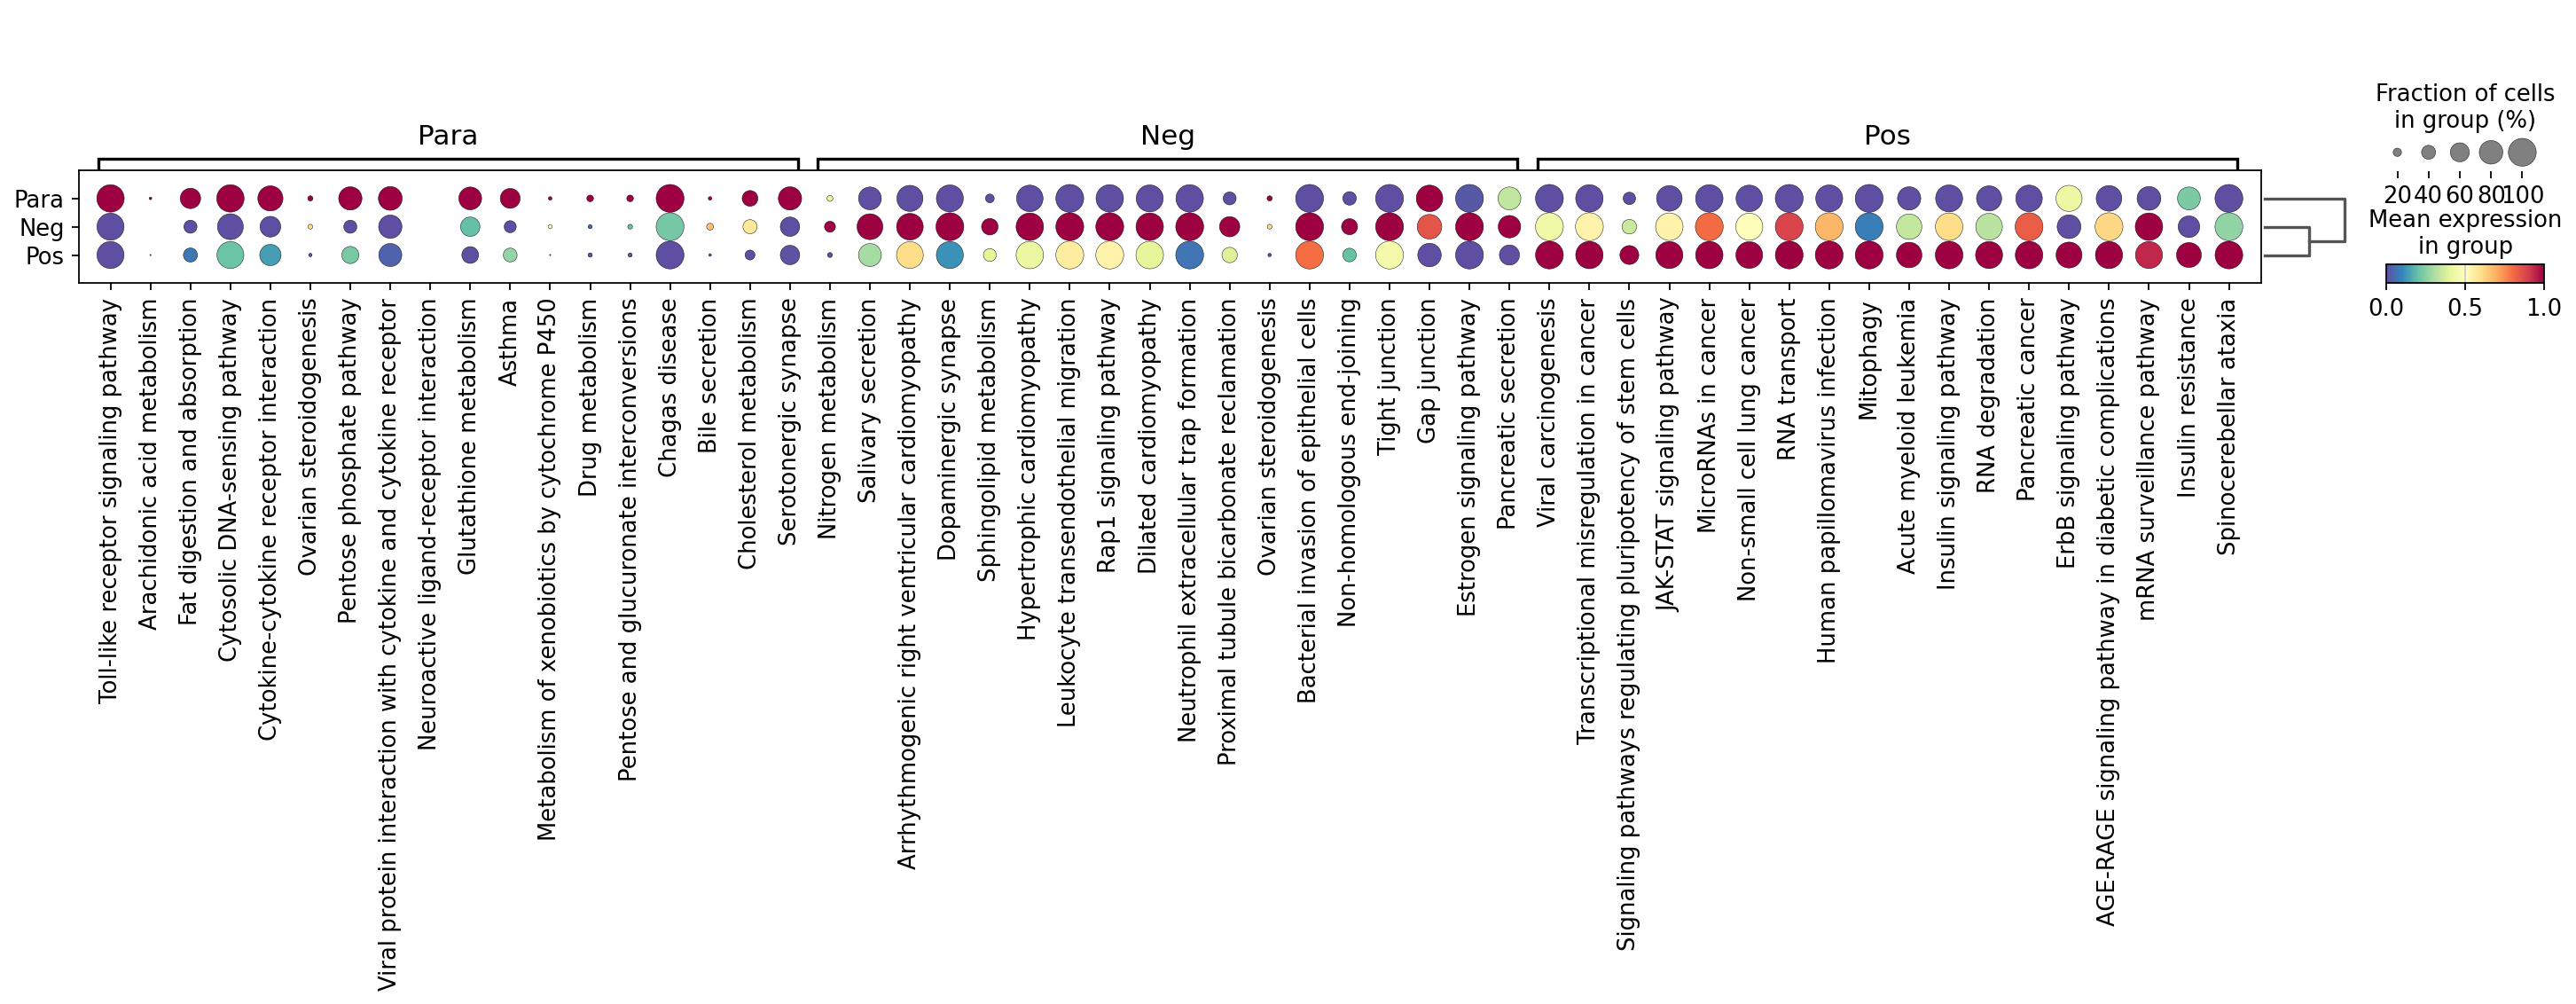

In [76]:
adata_mait = adata_pathway[adata_pathway.obs['Subcelltype']=='CD8.MAIT']
sc.tl.dendrogram(adata_mait,'Sample',use_rep='X_scVI')  
sc.tl.rank_genes_groups(adata_mait, 'Sample', use_rep='X_scVI',
                        method='wilcoxon',use_raw=False,key_added='Subcelltype_wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata_mait,groupby='Sample',
                                cmap='Spectral_r',key='Subcelltype_wilcoxon',
                                standard_scale='var',n_genes=18)

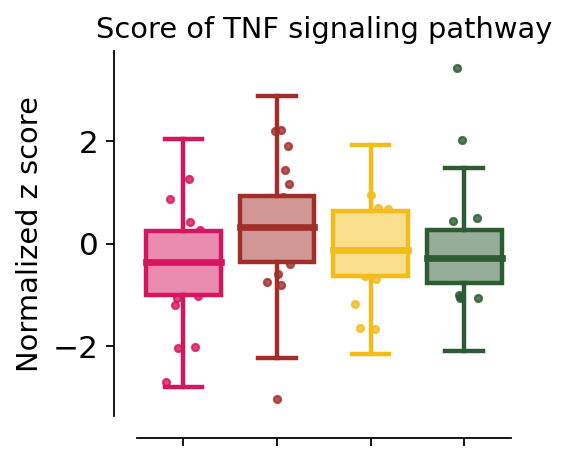

In [98]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')
from sklearn.preprocessing import StandardScaler

pathway_list = ['TNF signaling pathway']
for pathway_name in pathway_list:
    column_to_normalize = pathway_name+' score'
    scaler = StandardScaler()
    adata_pathway.obs['Z score of '+pathway_name] = scaler.fit_transform(adata_pathway.obs[[pathway_name]])
    
ax = ov.pl.single_group_boxplot(adata_pathway,groupby='Subcelltype_ID_type',
             color='Z score of TNF signaling pathway',
             type_color_dict=dict(zip(pd.Categorical(adata_concat.obs['Subcelltype_ID_type']).categories, adata_concat.uns['Subcelltype_ID_type_colors'])),
             x_ticks_plot=False,
             figsize=(3,3),
             kruskal_test=False,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Score of TNF signaling pathway',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=False,
             save=False,
             )
    
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig('Gastric/Figure/sFigure12/sFigure12_D_1.png', dpi=300,bbox_inches = 'tight')

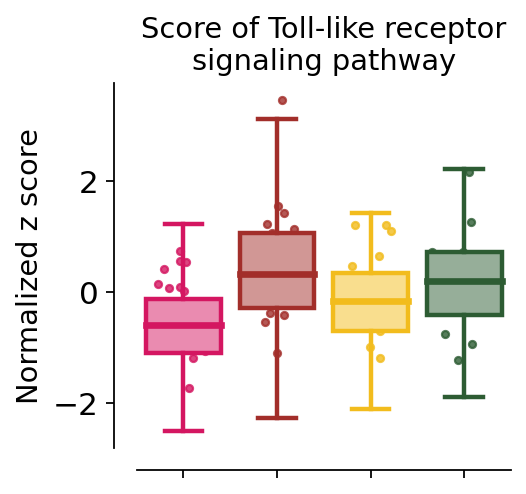

In [100]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')
from sklearn.preprocessing import StandardScaler

pathway_list = ['Toll-like receptor signaling pathway']
for pathway_name in pathway_list:
    column_to_normalize = pathway_name+' score'
    scaler = StandardScaler()
    adata_pathway.obs['Z score of '+pathway_name] = scaler.fit_transform(adata_pathway.obs[[pathway_name]])
    
ax = ov.pl.single_group_boxplot(adata_pathway,groupby='Subcelltype_ID_type',
             color='Z score of Toll-like receptor signaling pathway',
             type_color_dict=dict(zip(pd.Categorical(adata_concat.obs['Subcelltype_ID_type']).categories, adata_concat.uns['Subcelltype_ID_type_colors'])),
             x_ticks_plot=False,
             figsize=(3,3),
             kruskal_test=False,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Score of Toll-like receptor\nsignaling pathway',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=False,
             save=False,
             )
    
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig('Gastric/Figure/sFigure12/sFigure12_D_2.png', dpi=300,bbox_inches = 'tight')

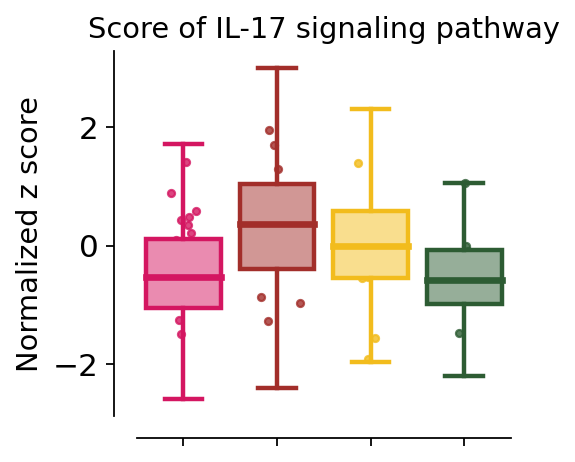

In [101]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')
from sklearn.preprocessing import StandardScaler

pathway_list = ['IL-17 signaling pathway']
for pathway_name in pathway_list:
    column_to_normalize = pathway_name+' score'
    scaler = StandardScaler()
    adata_pathway.obs['Z score of '+pathway_name] = scaler.fit_transform(adata_pathway.obs[[pathway_name]])
    
ax = ov.pl.single_group_boxplot(adata_pathway,groupby='Subcelltype_ID_type',
             color='Z score of IL-17 signaling pathway',
             type_color_dict=dict(zip(pd.Categorical(adata_concat.obs['Subcelltype_ID_type']).categories, adata_concat.uns['Subcelltype_ID_type_colors'])),
             x_ticks_plot=False,
             figsize=(3,3),
             kruskal_test=False,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Score of IL-17 signaling pathway',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=False,
             save=False,
             )
    
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig('Gastric/Figure/sFigure12/sFigure12_D_3.png', dpi=300,bbox_inches = 'tight')

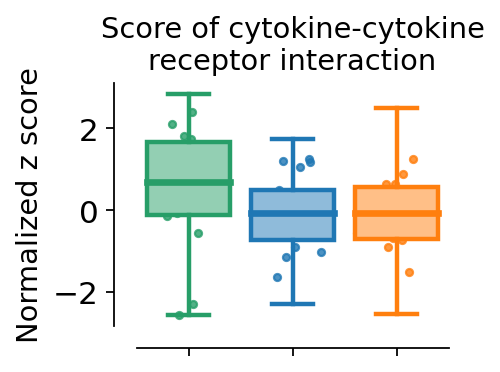

In [117]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')
adata_mait = adata_concat[adata_concat.obs['Subcelltype']=='CD8.MAIT']

pathway_list = ['Cytokine-cytokine receptor interaction']
for pathway_name in pathway_list:
    column_to_normalize = pathway_name+' score'
    scaler = StandardScaler()
    adata_mait.obs['Z score of '+pathway_name] = scaler.fit_transform(adata_mait.obs[[pathway_name+' score']])
    
ax = ov.pl.single_group_boxplot(adata_mait,groupby='Sample',
             color='Z score of Cytokine-cytokine receptor interaction',
             type_color_dict=dict(zip(pd.Categorical(adata_concat.obs['Sample']).categories, adata_concat.uns['Sample_colors'])),
             x_ticks_plot=False,
             figsize=(2.5,2),
             kruskal_test=False,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Score of cytokine-cytokine\nreceptor interaction',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=False,
             save=False,
             )
    
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig('Gastric/Figure/sFigure12/sFigure12_E_1.png', dpi=300,bbox_inches = 'tight')

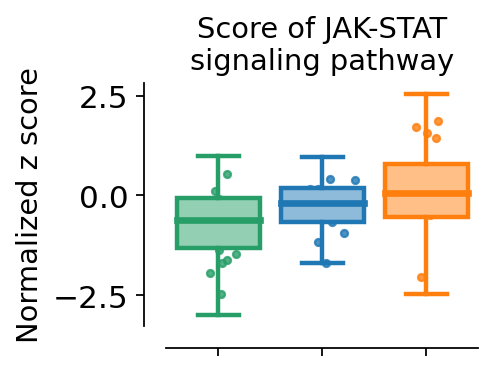

In [114]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')
adata_mait = adata_concat[adata_concat.obs['Subcelltype']=='CD8.MAIT']

pathway_list = ['JAK-STAT signaling pathway']
for pathway_name in pathway_list:
    column_to_normalize = pathway_name+' score'
    scaler = StandardScaler()
    adata_mait.obs['Z score of '+pathway_name] = scaler.fit_transform(adata_mait.obs[[pathway_name+' score']])
    
ax = ov.pl.single_group_boxplot(adata_mait,groupby='Sample',
             color='Z score of JAK-STAT signaling pathway',
             type_color_dict=dict(zip(pd.Categorical(adata_concat.obs['Sample']).categories, adata_concat.uns['Sample_colors'])),
             x_ticks_plot=False,
             figsize=(2.5,2),
             kruskal_test=False,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Score of JAK-STAT\nsignaling pathway',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=False,
             save=False,
             )
    
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig('Gastric/Figure/sFigure12/sFigure12_E_2.png', dpi=300,bbox_inches = 'tight')